# **A MACHINE LEARNING FRAMEWORK TO RELATE MATERIAL MICROSTRUCTURE TO MATERIAL PROPERTIES**


# 1. Import Libraries

In [544]:
from numpy import vstack
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from numpy import vstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import time
from sklearn.metrics import r2_score

# 2. Load the data

In [545]:
data=pd.read_csv('C:/Users/abhij/OneDrive/Documents/Pytorch/parameters1.csv') ##Change the file path as needed

In [546]:
data

,ID,VF,NO,MEAN,STD,AR,TC,DC,HP
0,2,0.1968,12,0.37,0.07,2.8299,0.530665,7.416923,241.8
1,3,0.0977,11,0.21,0.04,1.2510,0.398369,6.057783,261.1
2,4,0.1901,12,0.01,0.13,2.9024,0.518417,7.322267,249.9
3,5,0.1163,11,0.36,0.05,1.8492,0.423501,6.312040,259.9
4,8,0.1533,12,0.37,0.11,1.1920,0.464671,6.778300,252.5
...,...,...,...,...,...,...,...,...,...
995,6251,0.0124,10,0.10,0.00,2.2562,0.301519,5.034480,281.0
996,6285,0.0126,10,0.13,0.01,2.7862,0.301675,5.036163,281.0
997,6459,0.0125,10,0.14,0.02,1.0481,0.301312,5.034010,281.0
998,6641,0.0104,10,0.16,0.01,2.5738,0.299664,5.012640,280.9


In [547]:
#In the above data, column 0 is the ID number of material microstructure. It is not necessary.


# 3. Obtain inputs and outputs

In [548]:
#Columns 1  through 4 are the inputs. Columns 5 and 6 are the outputs

In [549]:
#Inputs
x = data.iloc[:,1:6].values
x=np.array(x)
x=x.astype(np.float32)  # Have to be converted to float else an error will pop up
#sc=StandardScaler()
#x=sc.fit_transform(x)

In [550]:
x

array([[1.9680e-01, 1.2000e+01, 3.7000e-01, 7.0000e-02, 2.8299e+00],
       [9.7700e-02, 1.1000e+01, 2.1000e-01, 4.0000e-02, 1.2510e+00],
       [1.9010e-01, 1.2000e+01, 1.0000e-02, 1.3000e-01, 2.9024e+00],
       ...,
       [1.2500e-02, 1.0000e+01, 1.4000e-01, 2.0000e-02, 1.0481e+00],
       [1.0400e-02, 1.0000e+01, 1.6000e-01, 1.0000e-02, 2.5738e+00],
       [1.5000e-02, 1.0000e+01, 1.0000e-01, 1.0000e-02, 2.7404e+00]],
      dtype=float32)

In [551]:
class2idx = {
    10:0,
    11:1,
    12:2,
    13:3,
}

idx2class = {v: k for k, v in class2idx.items()}

data['NO'].replace(class2idx, inplace=True)

In [552]:
#Outputs
y = data.iloc[:,6:9].values
y=np.array(y)
y=y.astype(np.float32)
#y=sc.fit_transform(y)

In [553]:
y

array([[  0.530665,   7.416923, 241.8     ],
       [  0.398369,   6.057783, 261.1     ],
       [  0.518417,   7.322267, 249.9     ],
       ...,
       [  0.301312,   5.03401 , 281.      ],
       [  0.299664,   5.01264 , 280.9     ],
       [  0.303946,   5.0626  , 279.8     ]], dtype=float32)

In [554]:
y

array([[  0.530665,   7.416923, 241.8     ],
       [  0.398369,   6.057783, 261.1     ],
       [  0.518417,   7.322267, 249.9     ],
       ...,
       [  0.301312,   5.03401 , 281.      ],
       [  0.299664,   5.01264 , 280.9     ],
       [  0.303946,   5.0626  , 279.8     ]], dtype=float32)

In [555]:
y1=np.mean(y)
y1

86.100586

In [556]:
y1=y/np.max(y)
y1=np.array(y1)
y1=y1.astype(np.float32)
y1

array([[0.00188849, 0.02639474, 0.86049825],
       [0.00141768, 0.02155795, 0.9291815 ],
       [0.0018449 , 0.02605789, 0.88932383],
       ...,
       [0.00107228, 0.01791463, 1.        ],
       [0.00106642, 0.01783858, 0.9996441 ],
       [0.00108166, 0.01801637, 0.9957295 ]], dtype=float32)

# 4. Train-Test split

In [557]:
#The data is split into a training set and test set. The training set is 80% of the data and the test set is 20% of the data

In [558]:
input_train, input_test, output_train, output_test = train_test_split(x,y,test_size = 0.2,random_state=42) 

# 5. The data is now converted to tensor form


In [559]:
#Train set is converted to tensor form
inputs_train = torch.from_numpy(input_train)
outputs_train = torch.from_numpy(output_train)
new_shape = (len(output_train), 3)
outputs_train = outputs_train.view(new_shape)
print(outputs_train.shape)

torch.Size([800, 3])


In [560]:
f = torch.nn.BatchNorm1d(5)
inputs_train=f(inputs_train)
inputs_train

tensor([[-1.5722, -1.5561, -1.1607, -0.7979, -1.2547],
        [ 1.1050,  0.5291,  1.3400,  0.0351,  0.5634],
        [ 0.8968,  0.5291,  2.9145,  0.4517, -1.1480],
        ...,
        [-1.5433, -1.5561, -1.3460, -0.7979,  0.9212],
        [ 0.0769,  0.5291,  0.4138, -0.5896, -1.3572],
        [-1.4312, -1.5561, -1.2534, -0.7979, -0.1126]],
       grad_fn=<NativeBatchNormBackward>)

In [561]:
f1 = torch.nn.BatchNorm1d(3)
outputs_train=f1(outputs_train)
outputs_train

tensor([[-1.3652, -1.4535,  1.6009],
        [ 1.0465,  1.1047, -1.2184],
        [ 0.7384,  0.8270, -0.7548],
        ...,
        [-1.3444, -1.4300,  1.5369],
        [-0.0484, -0.0088,  0.0073],
        [-1.2740, -1.3431,  1.4676]], grad_fn=<NativeBatchNormBackward>)

In [562]:
#Test set is converted to tensor form
inputs_test = torch.from_numpy(input_test)
outputs_test = torch.from_numpy(output_test)
new_shape = (len(output_test), 3)
outputs_test = outputs_test.view(new_shape)
print(outputs_test.shape)


torch.Size([200, 3])


In [563]:
f2 = torch.nn.BatchNorm1d(3)
outputs_test=f2(outputs_test)
outputs_test

tensor([[-0.9583, -0.9782,  1.0726],
        [ 1.0373,  1.0733, -1.0720],
        [ 1.0532,  1.1101, -1.4167],
        [ 0.8290,  0.7889, -1.1541],
        [ 0.2219,  0.1962, -0.3389],
        [ 0.7778,  0.8177, -0.7492],
        [ 1.4038,  1.4049, -1.5863],
        [ 0.6505,  0.6643, -0.6179],
        [-1.3859, -1.4695,  1.5704],
        [-1.1240, -1.1533,  1.2039],
        [ 1.9036,  1.7751, -1.5753],
        [-0.3852, -0.3411,  0.3012],
        [ 1.5472,  1.4615, -1.4495],
        [ 0.1031,  0.1564, -0.3115],
        [ 0.8889,  0.9630, -0.9845],
        [-0.7385, -0.7086,  0.6349],
        [-0.6770, -0.6383,  0.6623],
        [-0.6871, -0.6864,  0.6021],
        [ 1.2810,  1.2391, -1.1978],
        [ 0.0388,  0.0805, -0.3170],
        [-0.4639, -0.3870,  0.4106],
        [-0.0891, -0.0221, -0.3444],
        [-0.9474, -0.9558,  0.9796],
        [ 1.5198,  1.4219, -1.0556],
        [-0.6563, -0.6115,  0.5146],
        [-1.0589, -1.0777,  1.0617],
        [-0.4224, -0.3986,  0.4599],
 

In [564]:
f3 = torch.nn.BatchNorm1d(5)
inputs_test=f3(inputs_test)
inputs_test

tensor([[-9.8106e-01, -5.3151e-01, -2.3354e+00,  2.0687e+00,  1.1270e+00],
        [ 1.1034e+00,  5.5320e-01, -4.2195e-02,  2.5051e-01, -1.6655e+00],
        [ 1.1093e+00,  5.5320e-01,  1.0585e+00, -3.5556e-01,  1.1565e+00],
        [ 8.0631e-01,  5.5320e-01, -2.2565e-01, -3.5556e-01,  7.7972e-01],
        [ 2.4157e-01,  5.5320e-01,  3.2472e-01, -7.5960e-01,  1.1248e+00],
        [ 8.4875e-01,  5.5320e-01, -4.2195e-02, -5.5758e-01,  1.2437e+00],
        [ 1.3498e+00,  1.6379e+00, -7.7602e-01, -5.5758e-01, -1.7765e+00],
        [ 7.1435e-01,  5.5320e-01, -5.9256e-01,  6.5455e-01,  6.0275e-01],
        [-1.5859e+00, -1.6162e+00, -1.1429e+00, -7.5960e-01,  1.0388e-01],
        [-1.1874e+00, -1.6162e+00,  4.9534e-02, -3.5556e-01, -1.0343e+00],
        [ 1.6351e+00,  1.6379e+00,  8.7509e-01, -3.5556e-01, -5.7046e-01],
        [-2.6894e-01, -5.3151e-01, -4.2195e-02, -3.5556e-01,  7.0800e-01],
        [ 1.3522e+00,  1.6379e+00, -4.2195e-02,  1.0586e+00, -1.4431e-01],
        [ 2.2860e-01,  5.

# 6. Define datasets train and test sets


In [565]:
train_set = TensorDataset(inputs_train, outputs_train)
test_set = TensorDataset(inputs_test, outputs_test)

# 7. Load the datasets

In [566]:
train_data = DataLoader(train_set, 800, shuffle=True)
test_data = DataLoader(test_set, batch_size = 200, shuffle = True)

# 8. Build the neural network

In [567]:
class neural(nn.Module):
    # Initialize the layers
    def __init__(self):
        super().__init__()
        #self.linear11 = nn.Linear(5,40)
        #self.relu11 = nn.ReLU() # Activation function
        #self.linear10 = nn.Linear(40,40)
        #self.relu10 = nn.ReLU() # Activation function
        #self.linear9 = nn.Linear(40,40)
        #self.relu9 = nn.ReLU() # Activation function
        #self.linear8 = nn.Linear(40,40)
        #self.relu8 = nn.ReLU() # Activation function
        self.linear0 = nn.Linear(5,40)
        self.relu0 = nn.ReLU() # Activation function
        self.linear1 = nn.Linear(40,40)
        self.relu1 = nn.ReLU() # Activation function
        self.linear2 = nn.Linear(40, 40)
        self.act2 = nn.ReLU() # Activation function
        self.linear3 = nn.Linear(40,40)
        self.relu3 = nn.ReLU() # Activation function
        self.linear4 = nn.Linear(40, 40)
        self.relu4 = nn.ReLU() # Activation function
        self.linear5 = nn.Linear(40, 3)
        #self.relu5 = nn.ReLU() # Activation function
        #self.linear6 = nn.Linear(7, 5)
        #self.relu6 = nn.ReLU() # Activation function
        #self.linear7 = nn.Linear(3,3)
    
    # Perform the computation
    def forward(self, x):
        #x = self.linear11(x)
        #x = self.relu11(x)
        #x = self.linear10(x)
        #x = self.relu10(x)
        #x = self.linear9(x)
        #x = self.relu9(x)
        #x = self.linear8(x)
        #x = self.relu8(x)
        x = self.linear0(x)
        x = self.relu0(x)
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.act2(x)
        x = self.linear3(x)
        x = self.relu3(x)
        x = self.linear4(x)
        x = self.relu4(x)
        x = self.linear5(x)
        #x = self.relu5(x)
        #x = self.linear6(x)
        #x = self.relu6(x)
        #x = self.linear7(x)
        return x

# 9. Define the model

In [568]:
model = neural()

# 10. Define the optimizer


In [569]:
#different optimizers like Adam, SGD were tried but did not yield good results.
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3,betas=(0.9, 0.999),eps=1e-08)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# 11. Define the loss function

In [570]:
#Different loss functions were used but they yielded errors because this model has multiple outputs
loss_function=F.mse_loss

In [571]:
loss = loss_function(model(inputs_train), outputs_train)
print(loss)

tensor(1.0002, grad_fn=<MseLossBackward>)


# 12. Train the model

In [572]:
def fit(number_epochs, model, loss_function, optimizer):
    loss_list_train = []
    loss_list_test=[]
    #correct_val=0
    for epoch in range(number_epochs):
        for x1,y1 in train_data:
            # Generate predictions
            predict = model(Variable(x1))
            loss = loss_function(predict, Variable(y1))
            # Perform gradient descent
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #correct_val += (predict == y1).float().sum()
            if(epoch % 50 == 0):
                print('epoch {}, loss {}'.format(epoch, loss.data))
                length=0
                for x2, y2 in test_data:

                    test = Variable(x2)
                    predict_test = model(test)
                    loss_test = loss_function(predict_test,Variable(y2))
                loss_list_test.append(loss_test.data)
        loss_list_train.append(loss.data)
        #accuracy = 100 * correct_val / len(train_data)
        #print("Accuracy = {}".format(accuracy))
    print('Test loss: ', loss_function(model(test), y2))
    print('Training loss: ', loss_function(model(inputs_train), outputs_train))
    
    
    plt.plot(range(epoch+1),loss_list_train)
    #plt.ylim([0,0.05])
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss")
    plt.show()

# 13. Train the model for a few thousand epochs

epoch 0, loss 1.0002079010009766
epoch 50, loss 0.1050574779510498
epoch 100, loss 0.01962209679186344
epoch 150, loss 0.01287107914686203
epoch 200, loss 0.011175322346389294
epoch 250, loss 0.01037968322634697
epoch 300, loss 0.00993994902819395
epoch 350, loss 0.009622751735150814
epoch 400, loss 0.009368165396153927
epoch 450, loss 0.009162765927612782
epoch 500, loss 0.008981241844594479
epoch 550, loss 0.008815798908472061
epoch 600, loss 0.008658984676003456
epoch 650, loss 0.00851144827902317
epoch 700, loss 0.008357017301023006
epoch 750, loss 0.008182543329894543
epoch 800, loss 0.007989180274307728
epoch 850, loss 0.007815525867044926
epoch 900, loss 0.007667276076972485
epoch 950, loss 0.007527164649218321
epoch 1000, loss 0.007435191422700882
epoch 1050, loss 0.007281361613422632
epoch 1100, loss 0.007151927798986435
epoch 1150, loss 0.007088883779942989
epoch 1200, loss 0.006816924549639225
epoch 1250, loss 0.006690122187137604
epoch 1300, loss 0.006593678146600723
epoch 

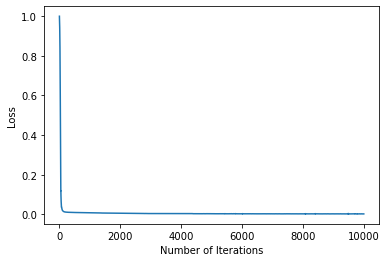

Execution time in seconds: 123.98047614097595


In [573]:
startTime = time.time()
fit(10000, model, loss_function, optimizer)  #can change the number of epochs
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

# 14. Generate prediction for test set


In [574]:
start = time.time()
pred1=model(inputs_test)
end  = time.time()
print("The time of execution is :", end-start)

The time of execution is : 0.00099945068359375


In [575]:
pred1


tensor([[-0.9568, -0.9762,  0.9232],
        [ 1.0880,  1.0655, -1.6707],
        [ 1.1534,  1.1091, -1.0689],
        [ 0.7711,  0.7708, -1.0100],
        [ 0.1485,  0.1970, -0.5582],
        [ 0.8624,  0.8325, -0.9239],
        [ 1.3515,  1.3416, -1.7073],
        [ 0.4993,  0.6032, -0.4670],
        [-1.3790, -1.4651,  1.6019],
        [-1.1206, -1.1437,  1.2017],
        [ 1.8446,  1.7967, -1.3622],
        [-0.3869, -0.3426,  0.2875],
        [ 1.4582,  1.3986, -1.1167],
        [ 0.0755,  0.1512, -0.0202],
        [ 0.8382,  0.9309, -0.6936],
        [-0.7382, -0.7120,  0.6343],
        [-0.6576, -0.6405,  0.5335],
        [-0.7014, -0.6908,  0.6557],
        [ 1.1938,  1.1947, -1.2915],
        [-0.0340,  0.0307,  0.0851],
        [-0.4337, -0.3669,  0.3370],
        [-0.0900, -0.0482, -0.1990],
        [-0.9340, -0.9503,  0.8801],
        [ 1.4194,  1.3793, -0.7781],
        [-0.7015, -0.6779,  0.2370],
        [-1.0515, -1.0714,  1.0878],
        [-0.4301, -0.3804,  0.2914],
 

In [576]:
outputs_test

tensor([[-0.9583, -0.9782,  1.0726],
        [ 1.0373,  1.0733, -1.0720],
        [ 1.0532,  1.1101, -1.4167],
        [ 0.8290,  0.7889, -1.1541],
        [ 0.2219,  0.1962, -0.3389],
        [ 0.7778,  0.8177, -0.7492],
        [ 1.4038,  1.4049, -1.5863],
        [ 0.6505,  0.6643, -0.6179],
        [-1.3859, -1.4695,  1.5704],
        [-1.1240, -1.1533,  1.2039],
        [ 1.9036,  1.7751, -1.5753],
        [-0.3852, -0.3411,  0.3012],
        [ 1.5472,  1.4615, -1.4495],
        [ 0.1031,  0.1564, -0.3115],
        [ 0.8889,  0.9630, -0.9845],
        [-0.7385, -0.7086,  0.6349],
        [-0.6770, -0.6383,  0.6623],
        [-0.6871, -0.6864,  0.6021],
        [ 1.2810,  1.2391, -1.1978],
        [ 0.0388,  0.0805, -0.3170],
        [-0.4639, -0.3870,  0.4106],
        [-0.0891, -0.0221, -0.3444],
        [-0.9474, -0.9558,  0.9796],
        [ 1.5198,  1.4219, -1.0556],
        [-0.6563, -0.6115,  0.5146],
        [-1.0589, -1.0777,  1.0617],
        [-0.4224, -0.3986,  0.4599],
 

In [577]:
vol=input_test[:,0]
vol
df = pd.DataFrame(vol)
df.to_csv('myfile.csv')
volume=vol.tolist()

# Convert test data to actual values

In [578]:
predictions=outputs_test.detach().numpy()

In [579]:
mean_el=np.mean(y[:,0])
std_el=np.std(y[:,0])
mean_mech=np.mean(y[:,-1])
std_mech=np.std(y[:,-1])
mean_di=np.mean(y[:,1])
std_di=np.std(y[:,1])

In [580]:
thermal=[]
dielectric=[]
mechanical=[]
for i in range(len(predictions[:,0])):
      thermal +=[predictions[i,0]*std_el+mean_el]
      dielectric +=[predictions[i,1]*std_di+mean_di]
      mechanical +=[predictions[i,2]*std_mech+mean_mech]

# Convert predicted data to actual values

In [581]:
predictions1=pred1.detach().numpy()

In [582]:
thermal_pred=[]
dielectric_pred=[]
mechanical_pred=[]
for i in range(len(predictions1[:,0])):
      thermal_pred +=[predictions1[i,0]*std_el+mean_el]
      dielectric_pred +=[predictions1[i,1]*std_di+mean_di]
      mechanical_pred +=[predictions1[i,2]*std_mech+mean_mech]

# 15. Plot true values and predicted values for the first output

In [583]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

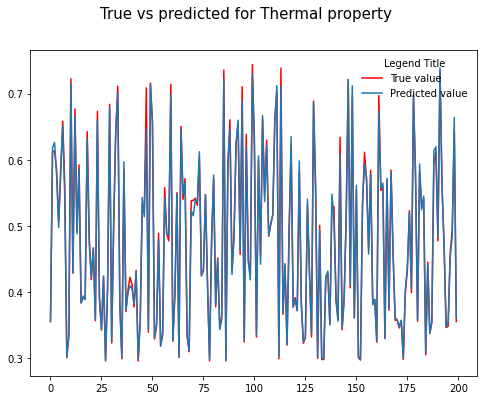

In [584]:
fig, ax = plt.subplots(1, figsize=(8, 6))
fig.suptitle('True vs predicted for Thermal property', fontsize=15)
ax.plot(thermal,color='red',label='True value')
ax.plot(thermal_pred,label='Predicted value')
ax.legend(loc="upper right", title="Legend Title", frameon=False)

# 16. Plot true value and predicted value for the second output

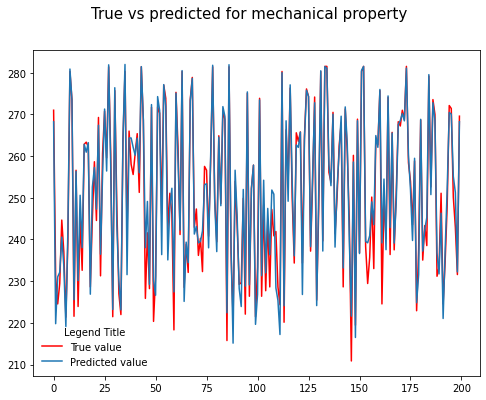

In [585]:
fig, ax = plt.subplots(1, figsize=(8, 6))
fig.suptitle('True vs predicted for mechanical property', fontsize=15)
ax.plot(mechanical,color='red',label='True value')
ax.plot(mechanical_pred,label='Predicted value')
ax.legend(loc="lower left", title="Legend Title", frameon=False)

# 17. Plot true value and predicted value for the third output

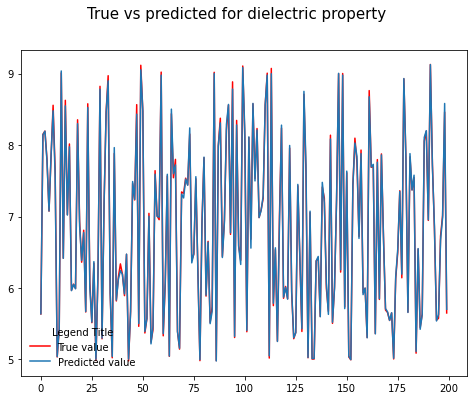

In [586]:
fig, ax = plt.subplots(1, figsize=(8, 6))
fig.suptitle('True vs predicted for dielectric property', fontsize=15)
ax.plot(dielectric,color='red',label='True value')
ax.plot(dielectric_pred,label='Predicted value')
ax.legend(loc="lower left", title="Legend Title", frameon=False)

# INPUT VS OUTPUT RELATIONS

# Mechanical property vs volume fraction

In [587]:
inp=input_test[:,0]
b=pred1[:,2].detach().numpy()*250.98859
inp

array([0.0664, 0.2432, 0.2437, 0.218 , 0.1701, 0.2216, 0.2641, 0.2102,
       0.0151, 0.0489, 0.2883, 0.1268, 0.2643, 0.169 , 0.2349, 0.0935,
       0.1002, 0.0945, 0.2515, 0.1631, 0.1246, 0.1541, 0.0686, 0.263 ,
       0.1026, 0.0569, 0.1202, 0.0108, 0.1067, 0.28  , 0.0373, 0.1805,
       0.2601, 0.2867, 0.089 , 0.0143, 0.224 , 0.081 , 0.1065, 0.1194,
       0.1084, 0.0874, 0.1305, 0.0101, 0.0702, 0.1991, 0.1804, 0.2559,
       0.052 , 0.2976, 0.2581, 0.0449, 0.0614, 0.1711, 0.0335, 0.0487,
       0.2073, 0.1674, 0.1666, 0.29  , 0.0416, 0.1009, 0.2034, 0.0159,
       0.257 , 0.2043, 0.2181, 0.0458, 0.025 , 0.1873, 0.1849, 0.2023,
       0.1971, 0.244 , 0.1243, 0.1316, 0.2021, 0.1133, 0.0105, 0.1616,
       0.2219, 0.0863, 0.1431, 0.0562, 0.0737, 0.2859, 0.0104, 0.2326,
       0.2489, 0.1282, 0.1618, 0.2443, 0.2664, 0.1521, 0.2806, 0.0389,
       0.2524, 0.1392, 0.123 , 0.2929, 0.2353, 0.0457, 0.2395, 0.1459,
       0.2662, 0.2016, 0.2441, 0.1669, 0.1712, 0.1827, 0.2644, 0.2914,
      

Text(0, 0.5, 'C10')

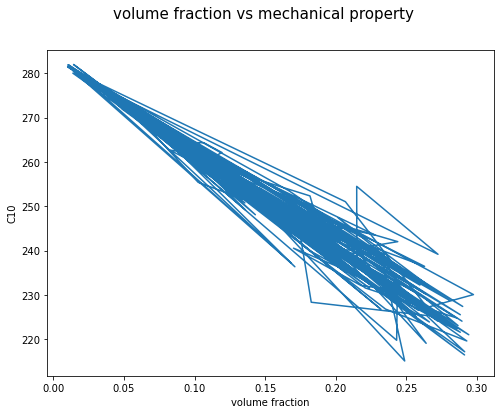

In [588]:
fig, ax = plt.subplots(1, figsize=(8, 6))
fig.suptitle('volume fraction vs mechanical property', fontsize=15)
ax.plot(inp,mechanical_pred)
plt.xlabel('volume fraction')
plt.ylabel('C10')

# Thermal property vs volume fraction


Text(0, 0.5, 'thermal conductivity')

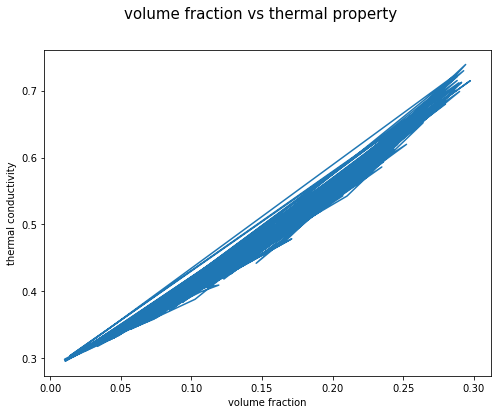

In [589]:
fig, ax = plt.subplots(1, figsize=(8, 6))
fig.suptitle('volume fraction vs thermal property', fontsize=15)
ax.plot(inp,thermal_pred)
plt.xlabel('volume fraction')
plt.ylabel('thermal conductivity')

In [590]:
thermal_pred

[0.35553354,
 0.61796784,
 0.6263605,
 0.57729733,
 0.49738353,
 0.58901393,
 0.6517799,
 0.5424071,
 0.30134505,
 0.3345158,
 0.71507335,
 0.42867061,
 0.6654736,
 0.48802295,
 0.5859085,
 0.3835889,
 0.39392793,
 0.3883113,
 0.63154364,
 0.4739719,
 0.42267245,
 0.46678454,
 0.3584568,
 0.66049135,
 0.38830465,
 0.34337363,
 0.42313522,
 0.29616392,
 0.40713888,
 0.6797613,
 0.32483992,
 0.5094356,
 0.6452832,
 0.7004401,
 0.3829874,
 0.3007704,
 0.5970131,
 0.37273312,
 0.39931345,
 0.40946984,
 0.40532786,
 0.38200364,
 0.43186578,
 0.29867002,
 0.35692683,
 0.5432388,
 0.5138713,
 0.6465177,
 0.343238,
 0.71478885,
 0.65504247,
 0.33057258,
 0.35007992,
 0.47860342,
 0.31798398,
 0.33879894,
 0.5428269,
 0.48765892,
 0.4861044,
 0.69862795,
 0.32713285,
 0.39751118,
 0.5487322,
 0.30159783,
 0.6464181,
 0.5475972,
 0.5661481,
 0.33386958,
 0.31139523,
 0.5235329,
 0.5153519,
 0.53899187,
 0.5362792,
 0.61220026,
 0.42405114,
 0.434864,
 0.5474961,
 0.4097991,
 0.29790086,
 0.47734

# Di electric property vs volume fraction

Text(0, 0.5, 'dielectric constant')

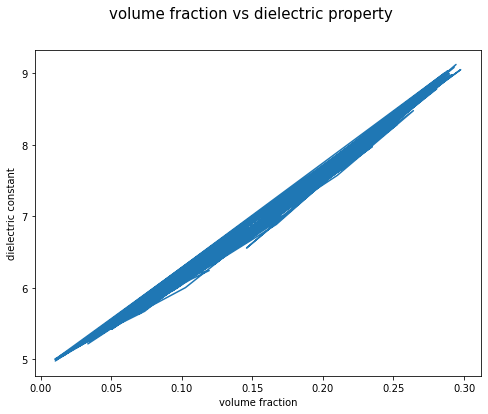

In [591]:
fig, ax = plt.subplots(1, figsize=(8, 6))
fig.suptitle('volume fraction vs dielectric property', fontsize=15)
ax.plot(inp,dielectric_pred)
plt.xlabel('volume fraction')
plt.ylabel('dielectric constant')

# Linear regression plot

# Mechanical property

r2 score for perfect model is 0.9499851588274822


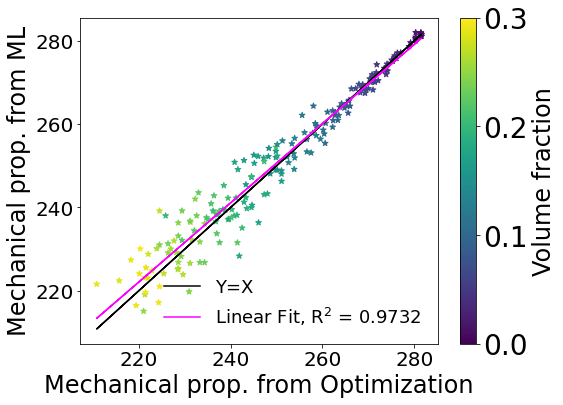

In [592]:
#a=outputs_test[:,-1].detach().numpy()*250.98859
#b=pred1[:,-1].detach().numpy()*250.98859
fig, ax = plt.subplots(1, figsize=(8, 6))
#fig.suptitle('Mechanical property', fontsize=28)
graph=ax.scatter(mechanical,mechanical_pred,c=volume,marker='*',vmin = 0, vmax =0.3)
ax.plot(mechanical,mechanical,color='black')
a, b = np.polyfit(np.array(mechanical), np.array(mechanical_pred), 1)
plt.plot(np.array(mechanical), a*np.array(mechanical)+b,color='magenta')
plt.xlabel('Mechanical prop. from Optimization',fontdict={'fontsize': 24})
plt.ylabel('Mechanical prop. from ML',fontdict={'fontsize': 24})
plt.legend(["Y=X", "Linear Fit, R$^2$ = 0.9732"], loc ="lower right",fontsize=18,frameon=False)
cbar = fig.colorbar(graph)
cbar.set_label(label='Volume fraction',size=24)
cbar.ax.tick_params(labelsize=28)
plt.locator_params(axis="x", nbins=4)
plt.locator_params(axis="y", nbins=4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
r2 = r2_score(mechanical,mechanical_pred)
print('r2 score for perfect model is', r2)
image_format = 'tif' # e.g .png, .svg, etc.
image_name = 'm_s.tif'

fig.savefig(image_name, format=image_format, dpi=1200)

# Di electric property

r2 score for perfect model is 0.998903656786414


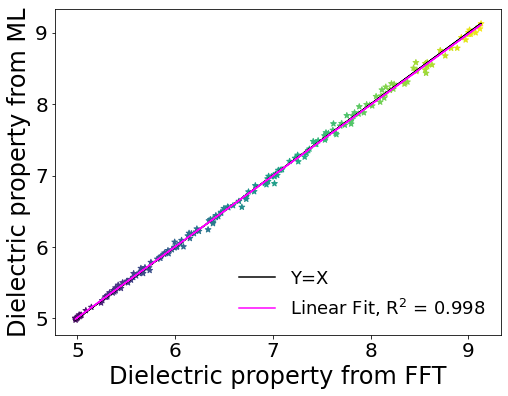

In [593]:
#a=outputs_test[:,1].detach().numpy()*6.834831
#b=pred1[:,1].detach().numpy()*6.834831
fig, ax = plt.subplots(1, figsize=(8, 6))
#fig.suptitle('Dielectric property', fontsize=28)
graph=ax.scatter(dielectric,dielectric_pred,c=volume,marker='*',vmin = 0, vmax =0.3)
ax.plot(dielectric,dielectric,color='black')
a, b = np.polyfit(np.array(dielectric), np.array(dielectric_pred), 1)
plt.plot(np.array(dielectric), a*np.array(dielectric)+b,color='magenta')
plt.xlabel('Dielectric property from FFT',fontdict={'fontsize': 24})
plt.ylabel('Dielectric property from ML',fontdict={'fontsize': 24})
#cbar = fig.colorbar(graph)
#cbar.set_label(label='Volume fraction',size=24)
#cbar.ax.tick_params(labelsize=28)
plt.legend(["Y=X", "Linear Fit, R$^2$ = 0.998"], loc ="lower right",fontsize=18,frameon=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
r2 = r2_score(dielectric,dielectric_pred)
print('r2 score for perfect model is', r2)
image_format = 'tif' # e.g .png, .svg, etc.
image_name = 'd_s.tif'

fig.savefig(image_name, format=image_format, dpi=1200)

# Thermal property

r2 score for perfect model is 0.9948248164306347


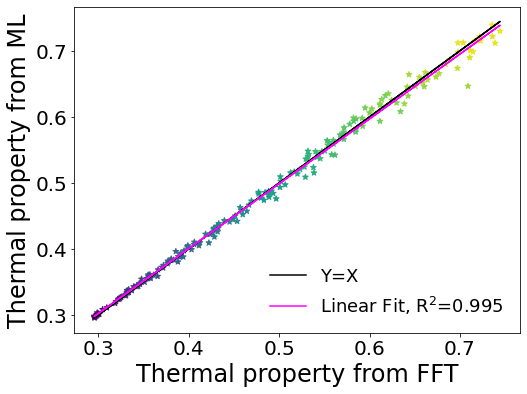

In [594]:
#a=outputs_test[:,0].detach().numpy()*0.47833043
#b=pred1[:,0].detach().numpy()*0.47833043
fig, ax = plt.subplots(1, figsize=(8, 6))
#fig.suptitle('Thermal property', fontsize=28)
graph=ax.scatter(thermal,thermal_pred,c=volume,marker='*',vmin = 0, vmax =0.3)
ax.plot(thermal,thermal,color='black')
a, b = np.polyfit(np.array(thermal), np.array(thermal_pred), 1)
plt.plot(np.array(thermal), a*np.array(thermal)+b,color='magenta')
plt.xlabel('Thermal property from FFT',fontdict={'fontsize': 24})
plt.ylabel('Thermal property from ML',fontdict={'fontsize': 24})
#cbar = fig.colorbar(graph)
#cbar.set_label(label='Volume fraction',size=24)
#cbar.ax.tick_params(labelsize=28)
plt.legend(["Y=X", "Linear Fit, R$^2$=0.995"], loc ="lower right",fontsize=18,frameon=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
r2 = r2_score(thermal,thermal_pred)
print('r2 score for perfect model is', r2)
image_format = 'tif' # e.g .png, .svg, etc.
image_name = 't_s.tif'

fig.savefig(image_name, format=image_format, dpi=1200)

# Contour plots


In [595]:
from mpl_toolkits import mplot3d
if not os.path.exists("images"):
    os.mkdir("images")

In [596]:
import plotly.graph_objects as go
import plotly.io as pio
fig = go.Figure(data =
    go.Contour(
        z=mechanical_pred,
        x=input_test[:,4], # horizontal axis
        y=input_test[:,0], # vertical axis
        colorbar=dict(
            tickfont_size=32)
    ))
fig['layout']['yaxis1'].update(title='Volume Fraction')
fig['layout']['xaxis1'].update(title='Aspect Ratio',title_font=dict(size = 36),tickfont_size=32)
fig['layout']['yaxis1'].update(title='Volume Fraction',title_font=dict(size = 36),tickfont_size=32)
#fig['layout'].update(title='Mechanical Properties',title_font=dict(size = 36))
fig.show()

In [597]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        z=thermal_pred,
        x=input_test[:,4], # horizontal axis
        y=input_test[:,0], # vertical axis
        colorbar=dict(
            title='Thermal Conductivity',titleside='right',titlefont=dict(size=36),tickfont_size=32)
    ))
fig['layout']['yaxis1'].update(title='volume fraction')
fig['layout']['xaxis1'].update(title='Aspect Ratio',title_font=dict(size = 36),tickfont_size=32)
fig['layout']['yaxis1'].update(title='Volume Fraction',title_font=dict(size = 36),tickfont_size=32)
#fig['layout'].update(title='Thermal properties',title_font=dict(size = 36))
#fig.write_image("images/fig1.png")
fig.show()


In [598]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        z=dielectric_pred,
        x=input_test[:,4], # horizontal axis
        y=input_test[:,0], # vertical axis
        colorbar=dict(
            title='Di Electric Constant',titleside='right',titlefont=dict(size=36),tickfont_size=32)
    ))
fig['layout']['yaxis1'].update(title='Volume fraction')
fig['layout']['xaxis1'].update(title='Aspect ratio',title_font=dict(size = 36),tickfont_size=32)
fig['layout']['yaxis1'].update(title='Volume fraction',title_font=dict(size = 36),tickfont_size=32)
#fig['layout'].update(title='Di Electric Properties',title_font=dict(size = 32))
fig.show()

In [599]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        z=dielectric_pred,
        x=input_test[:,2], # horizontal axis
        y=input_test[:,0], # vertical axis
        colorbar=dict(
        title='Di Electric Constant',titleside='right',titlefont=dict(size=36),tickfont_size=32)
    ))
fig['layout']['yaxis1'].update(title='volume fraction')
fig['layout']['xaxis1'].update(title='Mean size',title_font=dict(size = 36),tickfont_size=32)
fig['layout']['yaxis1'].update(title='Volume fraction',title_font=dict(size = 36),tickfont_size=32)
fig['layout'].update(title='Di electric properties',title_font=dict(size = 32))
fig.show()

In [600]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        z=mechanical_pred,
        x=input_test[:,2], # horizontal axis
        y=input_test[:,0], # vertical axis
                colorbar=dict(
            title='Hyper elastic parameter',titleside='right',titlefont=dict(size=36),tickfont_size=32)
    ))
fig['layout']['yaxis1'].update(title='volume fraction')
fig['layout']['xaxis1'].update(title='Mean size',title_font=dict(size = 36),tickfont_size=32)
fig['layout']['yaxis1'].update(title='Volume fraction',title_font=dict(size = 36),tickfont_size=32)
fig['layout'].update(title='Mechanical properties',title_font=dict(size = 32))
fig.show()

In [601]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        z=thermal,
        x=input_test[:,2], # horizontal axis
        y=input_test[:,0], # vertical axis
                colorbar=dict(
            title='Thermal conductivity',titleside='right',titlefont=dict(size=36),tickfont_size=32)
    ))
fig['layout']['yaxis1'].update(title='Volume fraction')
fig['layout']['xaxis1'].update(title='Mean size',title_font=dict(size = 36),tickfont_size=32)
fig['layout']['yaxis1'].update(title='Volume fraction',title_font=dict(size = 36),tickfont_size=32)
fig['layout'].update(title='Thermal properties',title_font=dict(size = 32))
fig.show()

In [602]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        z=thermal,
        x=input_test[:,2], # horizontal axis
        y=input_test[:,3],# vertical axis
        colorbar=dict(
            title='Thermal Conductivity',titleside='right',titlefont=dict(size=36),tickfont_size=32)
    ))
fig['layout']['yaxis1'].update(title='Standard Deviation',title_font=dict(size = 36),tickfont_size=32)
fig['layout']['xaxis1'].update(title='Mean Size',title_font=dict(size = 36),tickfont_size=32)
#fig['layout'].update(title='Thermal Properties',title_font=dict(size = 32))
fig.show()

In [603]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        z=mechanical,
        x=input_test[:,2], # horizontal axis
        y=input_test[:,3],# vertical axis
        colorbar=dict(title='',titleside='right',titlefont=dict(size=36),tickfont_size=32)
    ))
fig['layout']['yaxis1'].update(title='Standard Deviation',title_font=dict(size = 36),tickfont_size=32)
fig['layout']['xaxis1'].update(title='Mean Size',title_font=dict(size = 36),tickfont_size=32)
#fig['layout'].update(title='Mechanical Properties',title_font=dict(size = 32))
fig.show()

In [604]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        z=dielectric,
        x=input_test[:,2], # horizontal axis
        y=input_test[:,3], # vertical axis
        colorbar=dict(
            title='Di Electric Constant',titleside='right',titlefont=dict(size=36),tickfont_size=32) # title here
    ))
fig['layout']['yaxis1'].update(title='Standard Deviation',title_font=dict(size = 36),tickfont_size=32)
fig['layout']['xaxis1'].update(title='Mean Size',title_font=dict(size = 36),tickfont_size=32)
#fig['layout'].update(title='Di Electric Properties',title_font=dict(size = 32))
fig.show()

In [605]:
diel=pred1[:,1].detach().numpy()*6.834831
diel
df = pd.DataFrame(diel)
df.to_csv('myfile1.csv')

In [606]:
#data from VAE
data_vae=pd.read_csv('C:/Users/abhij/OneDrive/Documents/Pytorch/vae_data.csv',header=None) ##change the file path as needed

In [607]:
data_vae=data_vae.iloc[:,:].values
data_vae=np.array(data_vae)
data_vae=data_vae.astype(np.float32)
inv=torch.from_numpy(data_vae)


In [608]:
len(inv)

200

In [609]:
start1 = time.time()
pred2=model(inv)
end1 = time.time()
print("The time of execution of above program is :", end1-start1)

The time of execution of above program is : 0.0


In [610]:
pred2


tensor([[-1.0090e+00, -1.0341e+00,  1.0651e+00],
        [ 1.2364e+00,  1.1185e+00, -1.5464e+00],
        [ 1.0793e+00,  1.2726e+00, -7.0731e-01],
        [ 1.0069e+00,  1.0956e+00, -1.2399e+00],
        [ 2.6369e-01,  3.1900e-01, -4.4170e-01],
        [ 7.7861e-01,  8.0927e-01, -7.8507e-01],
        [ 1.8414e+00,  1.6720e+00, -1.3855e+00],
        [ 5.9170e-01,  6.5601e-01, -1.0217e+00],
        [-1.3702e+00, -1.4522e+00,  1.5716e+00],
        [-1.1134e+00, -1.1547e+00,  1.2440e+00],
        [ 1.9363e+00,  1.8436e+00, -1.6219e+00],
        [-3.9269e-01, -3.4334e-01,  1.9151e-01],
        [ 1.7290e+00,  1.5565e+00, -1.6047e+00],
        [ 8.9535e-02,  1.4656e-01, -6.0674e-01],
        [ 1.2195e+00,  1.1456e+00, -1.1956e+00],
        [-7.2505e-01, -7.1832e-01,  6.9022e-01],
        [-7.1907e-01, -7.0787e-01,  5.9888e-01],
        [-6.8674e-01, -6.7506e-01,  6.2730e-01],
        [ 1.2259e+00,  1.2129e+00, -1.3024e+00],
        [ 7.3419e-02,  1.3238e-01, -2.0842e-01],
        [-4.9394e-01

# Converting normalised data to actual values

In [611]:
b=pred2.detach().numpy()

In [612]:
mean_el=np.mean(y[:,0])
std_el=np.std(y[:,0])
mean_mech=np.mean(y[:,-1])
std_mech=np.std(y[:,-1])
mean_di=np.mean(y[:,1])
std_di=np.std(y[:,1])

In [613]:
thermal_inverse=[]
dielectric_inverse=[]
mechanical_inverse=[]
for i in range(len(b[:,0])):
      thermal_inverse +=[b[i,0]*std_el+mean_el]
      dielectric_inverse +=[b[i,1]*std_di+mean_di]
      mechanical_inverse +=[b[i,2]*std_mech+mean_mech]
      
     

In [614]:
len(mechanical_inverse)

200

# The predictions from inverse design vs actual predictions

# Mechanical property

r2 score for perfect model is 0.9049528694678274


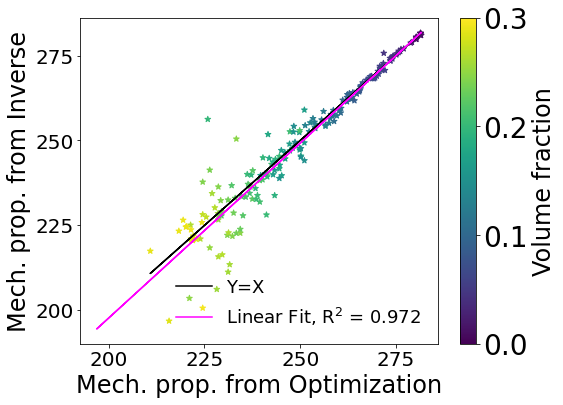

In [615]:
fig, ax = plt.subplots(1, figsize=(8, 6))
#fig.suptitle('Mechanical property', fontsize=28)
graph=ax.scatter(mechanical,mechanical_inverse,c=volume,marker='*',vmin = 0, vmax =0.3)
ax.plot(mechanical,mechanical,color='black')
a, b = np.polyfit(np.array(mechanical), np.array(mechanical_inverse), 1)
plt.plot(np.array(mechanical_inverse), a*np.array(mechanical_inverse)+b,color='magenta')
plt.ylabel('Mech. prop. from Inverse',fontdict={'fontsize': 24})
plt.xlabel('Mech. prop. from Optimization',fontdict={'fontsize': 24})
cbar = fig.colorbar(graph)
cbar.set_label(label='Volume fraction',size=24)
cbar.ax.tick_params(labelsize=28)
plt.legend(["Y=X", "Linear Fit, R$^2$ = 0.972"], loc ="lower right",fontsize=18,frameon=False)
plt.locator_params(axis="x", nbins=4)
plt.locator_params(axis="y", nbins=4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
r2 = r2_score(mechanical,mechanical_inverse)
print('r2 score for perfect model is', r2)
#image_format = 'tif' # e.g .png, .svg, etc.
#image_name = 'm_i.tif'

#fig.savefig(image_name, format=image_format, dpi=1200)

# Dielectric property

r2 score for perfect model is 0.9808996869647446


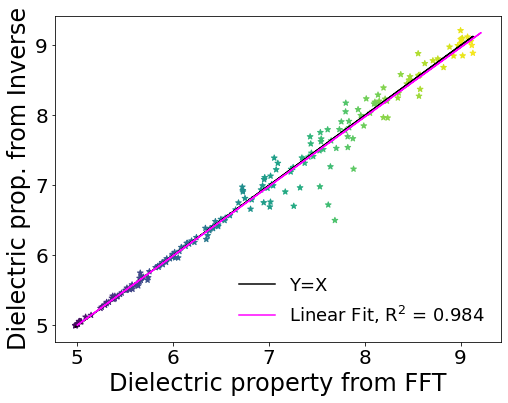

In [616]:
fig, ax = plt.subplots(1, figsize=(8, 6))
#fig.suptitle('Dielectric property', fontsize=28)
graph=ax.scatter(dielectric,dielectric_inverse,c=volume,marker='*',vmin = 0, vmax =0.3)
ax.plot(dielectric,dielectric,color='black')
a, b = np.polyfit(np.array(dielectric), np.array(dielectric_inverse), 1)
plt.plot(np.array(dielectric_inverse), a*np.array(dielectric_inverse)+b,color='magenta')
plt.ylabel('Dielectric prop. from Inverse',fontdict={'fontsize': 24})
plt.xlabel('Dielectric property from FFT',fontdict={'fontsize': 24})
#cbar = fig.colorbar(graph)
#cbar.set_label(label='Volume fraction',size=24)
#cbar.ax.tick_params(labelsize=24)
plt.legend(["Y=X", "Linear Fit, R$^2$ = 0.984"], loc ="lower right",fontsize=18,frameon=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
r2 = r2_score(dielectric,dielectric_inverse)
print('r2 score for perfect model is', r2)
#image_format = 'tif' # e.g .png, .svg, etc.
#image_name = 'd_i.tif'

#fig.savefig(image_name, format=image_format, dpi=1200)

# Thermal property

r2 score for perfect model is 0.9709253725578542


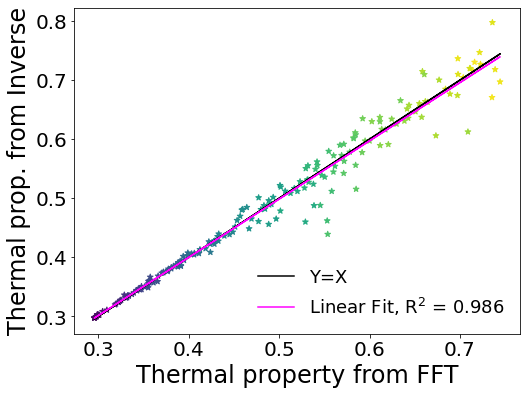

In [617]:
fig, ax = plt.subplots(1, figsize=(8, 6))
#fig.suptitle('Thermal Property', fontsize=28)
graph=ax.scatter(thermal,thermal_inverse,c=volume,marker='*',vmin = 0, vmax =0.3)
ax.plot(thermal,thermal,color='black')
a, b = np.polyfit(np.array(thermal), np.array(thermal_inverse), 1)
plt.plot(np.array(thermal), a*np.array(thermal)+b,color='magenta')
plt.ylabel('Thermal prop. from Inverse',fontdict={'fontsize': 24})
plt.xlabel('Thermal property from FFT',fontdict={'fontsize': 24})
#cbar = fig.colorbar(graph)
#cbar.set_label(label='Volume fraction',size=24)
#cbar.ax.tick_params(labelsize=28)
plt.legend(["Y=X", "Linear Fit, R$^2$ = 0.986"], loc ="lower right",fontsize=18,frameon=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#cbar.ax.tick_params(labelsize=15)
r2 = r2_score(thermal,thermal_inverse)
print('r2 score for perfect model is', r2)

#image_format = 'tif' # e.g .png, .svg, etc.
#image_name = 't_i.tif'

#fig.savefig(image_name, format=image_format, dpi=1200)

# Inverse design accuarcy

In [618]:
thermal_acc=[]
dielectric_acc=[]
mechanical_acc=[]
for i in range(len(thermal_inverse)):
      thermal_acc +=[(abs(thermal_inverse[i]-thermal[i])**2/200)**0.5]
      dielectric_acc +=[(abs(dielectric_inverse[i]-dielectric[i])**2/200)**0.5]
      mechanical_acc +=[(abs(mechanical_inverse[i]-mechanical[i])**2/200)**0.5]

In [619]:
tic=100-np.mean(thermal_acc)*100

In [620]:
tic

99.91418604613267

In [621]:
dic=100-np.mean(dielectric_acc)*100

In [622]:
dic

99.3643714753372

In [623]:
mic=100-np.mean(mechanical_acc)*100

In [624]:
mic

77.48809422911219

# Forward design accuracy

In [625]:
thermal_acc1=[]
dielectric_acc1=[]
mechanical_acc1=[]
for i in range(len(thermal_inverse)):
      thermal_acc1 +=[(abs(thermal_pred[i]-thermal[i])**2/200)**0.5]
      dielectric_acc1 +=[(abs(dielectric_pred[i]-dielectric[i])**2/200)**0.5]
      mechanical_acc1 +=[(abs(mechanical_pred[i]-mechanical[i])**2/200)**0.5]

In [626]:
mic1=100-np.mean(mechanical_acc1)*100

In [627]:
mic1

79.05330491170426

In [628]:
dic1=100-np.mean(dielectric_acc1)*100

In [629]:
dic1

99.79090653425806

In [630]:
tic1=100-np.mean(thermal_acc1)*100

In [631]:
tic1

99.95700440773683

In [632]:
# accuracy again repeat

In [633]:
tac1=(np.sum(thermal_acc))/np.mean(thermal)
tac1
      

0.35880616360944023

In [634]:
dac1=(np.sum(dielectric_acc))/np.mean(dielectric)
dac1

0.18599683246106374

In [635]:
mac1=(np.sum(mechanical_acc))/np.mean(mechanical)
mac1



0.17938589233454813

In [636]:
## final accuracy forward


In [637]:
thermal_acc1=[]
dielectric_acc1=[]
mechanical_acc1=[]
for i in range(len(thermal_inverse)):
      thermal_acc1 +=[((thermal_pred[i]-thermal[i])**2)]
      dielectric_acc1 +=[((dielectric_pred[i]-dielectric[i])**2)]
      mechanical_acc1 +=[((mechanical_pred[i]-mechanical[i])**2)]

In [638]:
acc=(np.sum(thermal_acc1)/200)**0.5/(np.max(thermal)-np.min(thermal))
acc

0.02057759960892806

In [639]:
acc=(np.sum(dielectric_acc1)/200)**0.5/(np.max(dielectric)-np.min(dielectric))
acc

0.009780648455959497

In [640]:
acc=(np.sum(mechanical_acc1)/200)**0.5/(np.max(mechanical)-np.min(mechanical))
acc

0.05907268101024179

In [641]:
## final accuracy inverse
thermal_acc=[]
dielectric_acc=[]
mechanical_acc=[]
for i in range(len(thermal_inverse)):
      thermal_acc +=[((thermal_inverse[i]-thermal[i])**2)]
      dielectric_acc +=[((dielectric_inverse[i]-dielectric[i])**2)]
      mechanical_acc +=[((mechanical_inverse[i]-mechanical[i])**2)]

In [642]:
acc=(np.sum(thermal_acc)/200)**0.5/(np.max(thermal)-np.min(thermal))
acc

0.04877406060833768

In [643]:
acc=((np.sum(dielectric_acc)/200)**0.5)/(np.max(dielectric)-np.min(dielectric))
acc

0.04082391232758807

In [644]:
acc=((np.sum(mechanical_acc)/200)**0.5)/(np.max(mechanical)-np.min(mechanical))
acc

0.08143418208101703

In [645]:
#mean maximum error
#forward

In [646]:
thermal_acc1=[]
dielectric_acc1=[]
mechanical_acc1=[]
for i in range(len(thermal_inverse)):
      thermal_acc1 +=[(abs(thermal_pred[i]-thermal[i]))]
      dielectric_acc1 +=[(abs(dielectric_pred[i]-dielectric[i]))]
      mechanical_acc1 +=[(abs(mechanical_pred[i]-mechanical[i]))]

In [647]:
acc=np.sum(thermal_acc1)/200
acc

0.0060804951190948486

In [648]:
acc=np.sum(dielectric_acc1)/200
acc

0.029570281505584717

In [649]:
acc=np.sum(mechanical_acc1)/200
acc

2.9623101806640624

In [650]:
## final accuracy inverse
#mean max
thermal_acc=[]
dielectric_acc=[]
mechanical_acc=[]
for i in range(len(thermal_inverse)):
      thermal_acc +=[(abs(thermal_inverse[i]-thermal[i]))]
      dielectric_acc +=[(abs(dielectric_inverse[i]-dielectric[i]))]
      mechanical_acc +=[(abs(mechanical_inverse[i]-mechanical[i]))]

In [651]:
acc=np.sum(thermal_acc)/200
acc

0.01213592529296875

In [652]:
acc=np.sum(mechanical_acc)/200
acc

3.1836642456054687

In [653]:
acc=np.sum(dielectric_acc)/200
acc

0.08989145278930664